In [9]:
import os
import pandas as pd

In [100]:
data_path = os.getcwd().replace('mlflow/notebooks','data')

data = {i:pd.read_csv(f"{data_path}/{i}.csv") for i in ["train","test"]}

# Data Visualization

In [34]:
import plotly.express as px
from sklearn.decomposition import PCA


In [101]:
df = data["train"].drop(columns=["rn"])

In [40]:
df

,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,STANDING,0.279,-0.01960,-0.1100,-0.9970,-0.9670,-0.983,-0.997,-0.9660,-0.983,...,0.1460,-0.2170,-0.5640,-0.2130,-0.2310,0.0146,-0.1900,-0.852,0.182,-0.0430
1,STANDING,0.277,-0.01270,-0.1030,-0.9950,-0.9730,-0.985,-0.996,-0.9740,-0.985,...,0.1210,0.3490,0.0577,0.0807,0.5960,-0.4760,0.1160,-0.852,0.188,-0.0347
2,STANDING,0.277,-0.01470,-0.1070,-0.9990,-0.9910,-0.993,-0.999,-0.9910,-0.992,...,0.7400,-0.5640,-0.7660,0.1060,-0.0903,-0.1320,0.4990,-0.850,0.189,-0.0351
3,STANDING,0.298,0.02710,-0.0617,-0.9890,-0.8170,-0.902,-0.989,-0.7940,-0.888,...,0.1310,0.2080,-0.0681,0.0623,-0.0587,0.0312,-0.2690,-0.731,0.283,0.0364
4,STANDING,0.276,-0.01700,-0.1110,-0.9980,-0.9910,-0.998,-0.998,-0.9890,-0.997,...,0.6670,-0.9420,-0.9660,0.2450,0.1030,0.0661,-0.4120,-0.761,0.263,0.0296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,WALKING_UPSTAIRS,0.357,-0.04460,-0.1300,-0.3140,-0.0556,-0.173,-0.386,-0.0575,-0.217,...,0.0168,-0.1630,-0.5930,-0.7110,-0.0612,-0.7060,0.0646,-0.660,0.274,0.1760
3605,WALKING_UPSTAIRS,0.344,0.00479,-0.1220,-0.3200,-0.0667,-0.182,-0.380,-0.0710,-0.245,...,-0.0292,0.1810,-0.2500,-0.4030,-0.7060,0.7390,0.8710,-0.653,0.278,0.1800
3606,WALKING_UPSTAIRS,0.284,-0.00796,-0.1190,-0.3090,-0.0804,-0.211,-0.369,-0.0971,-0.301,...,-0.1100,0.0245,-0.3930,-0.0761,-0.2390,0.9600,0.0866,-0.657,0.272,0.1830
3607,WALKING_UPSTAIRS,0.207,0.02460,-0.1040,-0.3650,-0.1690,-0.216,-0.449,-0.1860,-0.326,...,-0.2140,-0.3520,-0.7340,0.5350,-0.2570,0.9270,-0.0843,-0.657,0.267,0.1880


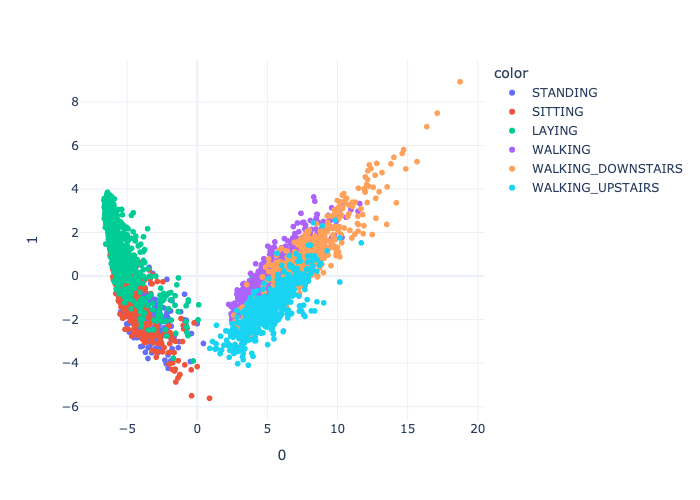

In [37]:
X = df.drop(columns=['activity'])

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=0, y=1, color=df['activity'],template="plotly_white")
fig.show("png")

# Understanding Activity Size

In [102]:
chunk = 1
chunk = [1]+[chunk:=chunk+1 if (activity!=df['activity'][i+1]) else chunk for i,activity in enumerate(df['activity'][:-1])]

In [103]:
df = df.assign(activity_chunk = chunk)
        

In [118]:
activity_chunks = df.groupby(["activity","activity_chunk"]).size().reset_index(name="length").sort_values("length")

In [120]:
activity_chunks

,activity,activity_chunk,length
343,WALKING_UPSTAIRS,129,1
359,WALKING_UPSTAIRS,194,1
382,WALKING_UPSTAIRS,312,1
366,WALKING_UPSTAIRS,228,1
322,WALKING_DOWNSTAIRS,399,1
...,...,...,...
19,LAYING,114,19
147,STANDING,165,19
26,LAYING,167,20
37,LAYING,243,20


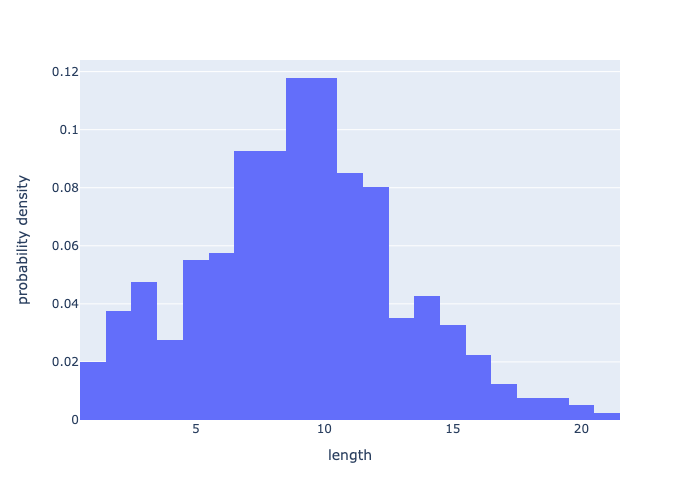

In [202]:
fig = px.histogram(activity_chunks, x="length", histnorm='probability density')
fig.show("png")

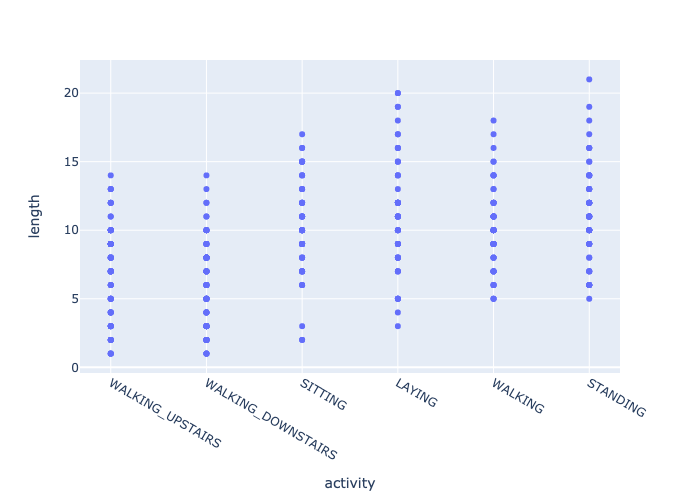

In [203]:
fig = px.scatter(activity_chunks, x="activity",y="length")
fig.show("png")

# Splitting Dataset by 7 Datapoints

In [131]:
df_long_chunks = df.groupby(["activity","activity_chunk"]).filter(lambda x: len(x) >= 7)

In [132]:
df_long_chunks

,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean,activity_chunk
0,STANDING,0.279,-0.01960,-0.1100,-0.997,-0.9670,-0.983,-0.997,-0.9660,-0.983,...,-0.2170,-0.5640,-0.2130,-0.2310,0.0146,-0.1900,-0.852,0.182,-0.0430,1
1,STANDING,0.277,-0.01270,-0.1030,-0.995,-0.9730,-0.985,-0.996,-0.9740,-0.985,...,0.3490,0.0577,0.0807,0.5960,-0.4760,0.1160,-0.852,0.188,-0.0347,1
2,STANDING,0.277,-0.01470,-0.1070,-0.999,-0.9910,-0.993,-0.999,-0.9910,-0.992,...,-0.5640,-0.7660,0.1060,-0.0903,-0.1320,0.4990,-0.850,0.189,-0.0351,1
3,STANDING,0.298,0.02710,-0.0617,-0.989,-0.8170,-0.902,-0.989,-0.7940,-0.888,...,0.2080,-0.0681,0.0623,-0.0587,0.0312,-0.2690,-0.731,0.283,0.0364,1
4,STANDING,0.276,-0.01700,-0.1110,-0.998,-0.9910,-0.998,-0.998,-0.9890,-0.997,...,-0.9420,-0.9660,0.2450,0.1030,0.0661,-0.4120,-0.761,0.263,0.0296,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,WALKING_UPSTAIRS,0.144,-0.03990,-0.0451,-0.355,-0.0158,-0.233,-0.465,-0.0364,-0.327,...,-0.3750,-0.7800,0.5560,-0.2060,-0.9440,0.2980,-0.661,0.271,0.1800,398
3604,WALKING_UPSTAIRS,0.357,-0.04460,-0.1300,-0.314,-0.0556,-0.173,-0.386,-0.0575,-0.217,...,-0.1630,-0.5930,-0.7110,-0.0612,-0.7060,0.0646,-0.660,0.274,0.1760,398
3605,WALKING_UPSTAIRS,0.344,0.00479,-0.1220,-0.320,-0.0667,-0.182,-0.380,-0.0710,-0.245,...,0.1810,-0.2500,-0.4030,-0.7060,0.7390,0.8710,-0.653,0.278,0.1800,398
3606,WALKING_UPSTAIRS,0.284,-0.00796,-0.1190,-0.309,-0.0804,-0.211,-0.369,-0.0971,-0.301,...,0.0245,-0.3930,-0.0761,-0.2390,0.9600,0.0866,-0.657,0.272,0.1830,398


# Creating Local Dataset 



In [204]:
"""
Data Structure

/Activity_1
    data_chunk_1.csv
    data_chunk_2.csv
    ...
/Activity_2
    data_chunk_1.csv
    data_chunk_2.csv


"""



def create_dataset(df):
    
    for activity in df.activity.unique():
        
        new_path = f"{data_path}/{activity}"
        if not os.path.exists(new_path):

            os.makedirs(new_path)
        
    
    for index, activity_chunk in enumerate(df.activity_chunk.unique()):
        chunk = df.query("activity_chunk == @activity_chunk")
        
        window_size = 7
        
        if chunk.activity.nunique()==1:
            folder = chunk.activity.unique()[0]
            
            for i in range(len(chunk)-window_size+1):

              
                chunk[i:window_size+i].drop(columns=['activity','activity_chunk']).to_csv(f"{data_path}/{folder}/chunk_{activity_chunk}_{i}.csv",index=False)
                print(f"saved to : {data_path}/{folder}/chunk_{activity_chunk}_{i}.csv")


       

In [199]:
from concurrent.futures import ThreadPoolExecutor


def process_chunk(activity_chunk):
    chunk = df.query(f"activity_chunk == {activity_chunk}")
    if chunk.activity.nunique() == 1:
        folder = chunk.activity.unique()[0]
        window_size = 7
        for i in range(len(chunk) - window_size + 1):
            chunk_slice = chunk[i:window_size + i].drop(columns=['activity', 'activity_chunk'])
            chunk_slice.to_csv(f"{data_path}/{folder}/chunk_{activity_chunk}_{i}.csv", index=False)
            print(f"saved to : {data_path}/{folder}/chunk_{activity_chunk}_{i}.csv")
    


def create_dataset_multithreaded(df):
    
    for activity in df.activity.unique():
        
        new_path = f"{data_path}/{activity}"
        if not os.path.exists(new_path):

            os.makedirs(new_path)
            
    with ThreadPoolExecutor(max_workers=10) as executor:
        executor.map(process_chunk, df.activity_chunk.unique())
        

In [201]:
import time


start = time.time()
create_dataset_multithreaded(df_long_chunks)
end = time.time()
print(f"{end - start} seconds")


saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_UPSTAIRS/chunk_6_0.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_3_0.csv

saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_2_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_UPSTAIRS/chunk_14_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_DOWNSTAIRS/chunk_5_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_16_0.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_1_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_3_1.csv

saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_UPSTAIRS/chunk_6_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_12_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_16_1.csv
saved to : 

saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_DOWNSTAIRS/chunk_32_0.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_29_3.csv

saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_22_6.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_12_10.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_UPSTAIRS/chunk_33_0.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_30_1.csv



saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_28_4.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_25_7.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_31_2.csv

saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_30_2.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_29_4.csv

saved to : /Users/arumi


saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_53_2.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_61_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_UPSTAIRS/chunk_57_2.csv

saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_52_3.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_59_2.csv

saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_DOWNSTAIRS/chunk_44_7.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_60_1.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_46_7.csv

saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_64_0.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_UPSTAIRS/chunk_63_0.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_DOWNSTAIRS/chunk_62_1.csv




saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_89_5.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_95_2.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_94_4.csv

saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_97_1.csv

saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_96_1.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_85_6.csv

saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_DOWNSTAIRS/chunk_92_4.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_UPSTAIRS/chunk_99_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_DOWNSTAIRS/chunk_98_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_91_5.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_95_3.csv

saved to : 

saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_127_0.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_118_4.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_114_7.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_126_0.csv


saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_124_1.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_UPSTAIRS/chunk_123_1.csv


saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_121_2.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_DOWNSTAIRS/chunk_122_2.csv

saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_119_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_126_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_134_0.csv
saved to : /




saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_141_7.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_143_5.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_157_1.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_150_2.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_159_0.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_151_2.csv

saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_158_0.csv



saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_149_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_152_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_158_1.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_151_3.csv

saved to : /Users/arumi/real-t

saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_187_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_188_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_182_6.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_167_10.csv

saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_183_5.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_189_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_181_6.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_167_11.csv

saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_187_4.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_188_4.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_165_12.csvsaved to : /Users/arumi/real-tim

saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_211_4.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_215_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_205_8.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_217_1.csv

saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_206_8.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_212_5.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_216_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_UPSTAIRS/chunk_214_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_209_7.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_217_2.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_206_9.csv

saved to : /Users/arumi/r

saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_236_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_229_7.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_221_9.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_DOWNSTAIRS/chunk_239_0.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_235_2.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_231_4.csv


saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_238_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_241_0.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_230_5.csv

saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_236_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_UPSTAIRS/chunk_240_0.csvsaved to :

saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_263_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_264_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_243_10.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_257_4.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_267_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_256_5.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_DOWNSTAIRS/chunk_259_2.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_UPSTAIRS/chunk_266_0.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_268_0.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_261_2.csv


saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_243_11.csv
saved to : /U


saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_DOWNSTAIRS/chunk_279_4.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_281_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_UPSTAIRS/chunk_286_1.csv

saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_DOWNSTAIRS/chunk_285_1.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_278_5.csv

saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_287_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_282_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_DOWNSTAIRS/chunk_279_5.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_281_4.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_DOWNSTAIRS/chunk_285_2.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/


saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_328_2.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_330_0.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_UPSTAIRS/chunk_327_2.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_324_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_329_0.csv



saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_331_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_324_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_315_5.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_UPSTAIRS/chunk_327_3.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_329_1.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_334_0.csvsaved to : /Users

saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_353_3.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_UPSTAIRS/chunk_351_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_340_8.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_DOWNSTAIRS/chunk_356_2.csv

saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_355_3.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_352_4.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_340_9.csv

saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_358_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_359_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_360_0.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_358_2.csv

saved to

saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_375_5.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_DOWNSTAIRS/chunk_385_1.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_383_1.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_382_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_381_2.csv



saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_UPSTAIRS/chunk_380_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_384_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_389_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_390_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_382_2.csvsaved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_388_0.csv

saved to : /

In [200]:
import time

start = time.time()
create_dataset(df_long_chunks)
end = time.time()
print(f"{end - start} seconds")


saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_1_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_1_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_2_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_3_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_3_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_3_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_3_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_3_4.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_4_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_4_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_4_2.csv
saved to : /Users/arumi/real-time-activity-recognition/sr

saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_29_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_29_4.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_30_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_30_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_30_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_30_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_30_4.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_30_5.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_31_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_31_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_31_2.csv
saved to : /Users/arumi/real-time-activity-recogn

saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_53_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_53_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_53_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_54_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_54_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_DOWNSTAIRS/chunk_56_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_UPSTAIRS/chunk_57_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_UPSTAIRS/chunk_57_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_UPSTAIRS/chunk_57_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_59_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_59_1.csv
saved t

saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_89_6.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_89_7.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_90_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_90_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_90_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_91_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_91_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_91_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_91_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_91_4.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_91_5.csv
saved to : /Users/arumi/real-time-activity-rec

saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_115_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_115_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_DOWNSTAIRS/chunk_116_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_DOWNSTAIRS/chunk_116_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_UPSTAIRS/chunk_117_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_UPSTAIRS/chunk_117_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_UPSTAIRS/chunk_117_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_118_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_118_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_118_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STAN

saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_143_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_143_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_143_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_143_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_143_4.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_143_5.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_143_6.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_143_7.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_143_8.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_143_9.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_143_10.csv
saved to : /Users/arumi/real-time-activity

saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_168_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_173_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_173_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_173_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_173_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_174_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_174_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_174_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_174_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_175_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_175_1.csv
saved to : /Users/arumi/real-t

saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_205_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_205_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_205_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_205_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_205_4.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_205_5.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_205_6.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_205_7.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_205_8.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_206_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_206_1.csv
saved to : /Users/arumi/real-time-activit

saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_221_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_221_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_221_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_221_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_221_4.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_221_5.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_221_6.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_221_7.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_221_8.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_221_9.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_221_10.csv
saved to : /Users/ar

saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_241_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_241_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_241_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_241_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_241_4.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_241_5.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_241_6.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_241_7.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_241_8.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_241_9.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_241_10.csv
saved to : /Users/ar

saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_267_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_267_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_267_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/STANDING/chunk_267_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_268_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_268_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_268_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_268_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_269_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_269_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_269_2.csv
saved to : /Users/arumi/real-ti

saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_UPSTAIRS/chunk_292_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING_UPSTAIRS/chunk_292_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_294_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_294_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_294_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_295_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_295_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_295_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_295_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_295_4.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_295_5.csv
saved to : /Users/ar

saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_335_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_335_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_336_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_336_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_336_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_336_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_336_4.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_336_5.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_337_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_337_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/WALKING/chunk_337_2.csv
saved to : /Users/arumi/real-time-acti

saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_359_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_359_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_360_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_360_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_360_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_360_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_360_4.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_360_5.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_360_6.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_360_7.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_360_8.csv
saved to : /Users/arumi/real-time-activit

saved to : /Users/arumi/real-time-activity-recognition/src/data/SITTING/chunk_382_8.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_383_0.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_383_1.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_383_2.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_383_3.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_383_4.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_383_5.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_383_6.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_383_7.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_383_8.csv
saved to : /Users/arumi/real-time-activity-recognition/src/data/LAYING/chunk_383_9.csv
saved to : /Users/arumi/real-time-activity